In [3]:
# importing the libraries
import pandas as pd
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Reading the cleaned data csv file
df = pd.read_csv('c_data.csv')
df


,Unnamed: 0,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,COUNTY_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,0,2016,2,1,1,295.00,259.00,85.00,16.00,4.00,18.00,3.00,2.00,0.00,21.00,11.00
1,1,2016,2,1,2,295.00,259.00,86.00,16.00,3.00,18.00,3.00,1.00,0.00,21.00,10.00
2,2,2016,2,1,3,295.00,259.00,84.00,16.00,5.00,18.00,2.00,2.00,1.00,21.00,11.00
3,3,2016,2,1,4,222.68,185.55,81.23,12.56,8.31,15.57,7.31,1.47,0.74,17.91,9.35
4,4,2016,2,1,5,295.00,259.00,64.00,16.00,6.00,18.00,7.00,2.00,1.00,21.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332903,332903,2019,4,68,16,31.00,31.00,100.00,3.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
332904,332904,2019,4,68,1,47.00,42.00,89.00,9.00,19.00,0.00,0.00,0.00,0.00,3.00,6.00
332905,332905,2019,4,68,3,27.00,26.00,96.00,7.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00
332906,332906,2019,4,68,10,38.00,36.00,95.00,5.00,13.00,0.00,0.00,0.00,0.00,2.00,5.00


In [5]:
# Taking Down Unwanted Columns
dn_model = df.drop(['GRAD_CNT'], axis = 1)
dn_model.columns

Index(['Unnamed: 0', 'REPORT_SCHOOL_YEAR', 'AGGREGATION_INDEX', 'COUNTY_CODE',
       'SUBGROUP_CODE', 'ENROLL_CNT', 'GRAD_PCT', 'LOCAL_CNT', 'LOCAL_PCT',
       'STILL_ENR_CNT', 'STILL_ENR_PCT', 'GED_CNT', 'GED_PCT', 'DROPOUT_CNT',
       'DROPOUT_PCT'],
      dtype='object')

In [6]:
# Training and testing the dataset model
df_train = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR != '2019']
df_test = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR == 2019]

In [7]:
# Train data and Test data
df_train.shape
df_train.head()
df_test.shape
df_test.head()

,Unnamed: 0,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,COUNTY_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
232484,232484,2019,2,1,1,295.00,88.00,16.00,5.00,18.00,2.00,2.00,0.00,21.00,9.00
232485,232485,2019,2,1,2,295.00,90.00,16.00,5.00,18.00,1.00,1.00,0.00,21.00,8.00
232486,232486,2019,2,1,3,295.00,86.00,16.00,6.00,18.00,2.00,2.00,0.00,21.00,9.00
232487,232487,2019,2,1,4,222.68,81.23,12.56,8.31,15.57,7.31,1.47,0.74,17.91,9.35
232488,232488,2019,2,1,5,295.00,77.00,16.00,10.00,18.00,3.00,0.00,0.00,21.00,18.00


In [8]:
# Importing the column 'Dropout_cnt' into test data and train data
y_test = df_test['DROPOUT_PCT']
y_train = df_train['DROPOUT_PCT']
df_target = df['DROPOUT_PCT']
X_train = df_train[df_train.columns.difference(['DROPOUT_PCT'])]
X_test = df_test[df_test.columns.difference(['DROPOUT_PCT'])]

In [9]:
##DecisionTreeRegressor

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dn_model,df_target,test_size=0.35,random_state=124)

In [83]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(216390, 15) (116518, 15) (216390,) (116518,)


In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',max_depth=2,splitter='best',min_samples_split=5)
dt_fit = dt.fit(X_train,Y_train)

In [89]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
y_accu = dt_fit.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_accu))
print(r2_score(Y_test,y_accu))


0.8896336983288526


In [87]:
predicted = pd.DataFrame(y_accu,Y_test).reset_index()
predicted.columns = ['predicted','Actual']
predicted.head(15)

,predicted,Actual
0,11.00,10.465598
1,32.00,25.296117
2,0.00,2.147335
3,9.35,10.465598
4,9.35,10.465598
5,5.00,2.147335
6,0.00,2.147335
7,15.00,10.465598
8,0.00,2.147335
9,9.00,10.465598


In [15]:
#Linear Regression Model

In [16]:
# Modeling the dataset for performing the Regression Models
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

import numpy as np


In [17]:
# Taking Down Unwanted Columns
dn_model = df.drop(['GRAD_CNT'], axis = 1)
dn_model.columns

Index(['Unnamed: 0', 'REPORT_SCHOOL_YEAR', 'AGGREGATION_INDEX', 'COUNTY_CODE',
       'SUBGROUP_CODE', 'ENROLL_CNT', 'GRAD_PCT', 'LOCAL_CNT', 'LOCAL_PCT',
       'STILL_ENR_CNT', 'STILL_ENR_PCT', 'GED_CNT', 'GED_PCT', 'DROPOUT_CNT',
       'DROPOUT_PCT'],
      dtype='object')

In [18]:
# Training and testing the dataset model
df_train = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR != '2019']
df_test = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR == 2019]

In [19]:
# Importing the column 'Dropout_cnt' into test data and train data
y_test = df_test['DROPOUT_PCT']
y_train = df_train['DROPOUT_PCT']
df_target = df['DROPOUT_PCT']
X_train = df_train[df_train.columns.difference(['DROPOUT_PCT'])]
X_test = df_test[df_test.columns.difference(['DROPOUT_PCT'])]

In [20]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict_LR = lr_model.predict(X_test)



In [21]:
accu_train = lr_model.score(X_train,y_train)
accu_train

0.9169907095984111

In [22]:
accu_test = lr_model.score(X_test,y_test)
accu_test

0.9351165276334512

In [23]:
predicted =  lr_model.predict(X_test)

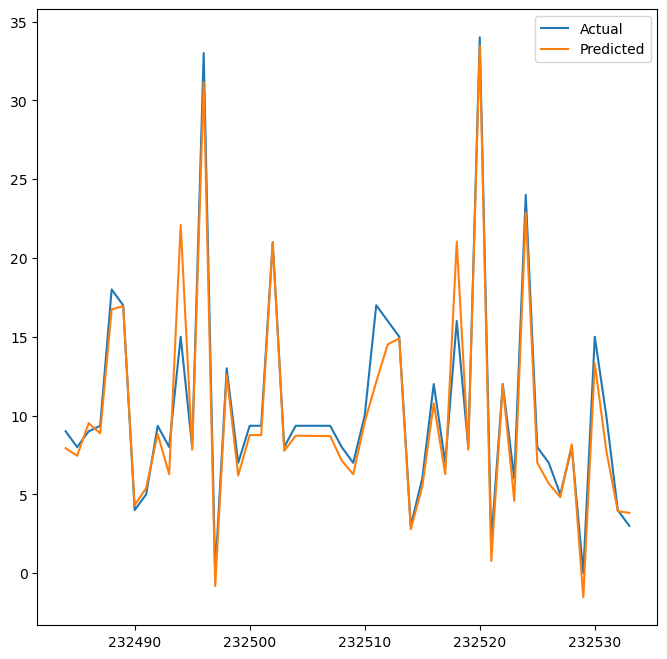

In [24]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(8,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [30]:
##Polynomial Regression

In [31]:
# Reading the cleaned data csv file
df = pd.read_csv('c_data.csv')
df


,Unnamed: 0,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,COUNTY_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,0,2016,2,1,1,295.00,259.00,85.00,16.00,4.00,18.00,3.00,2.00,0.00,21.00,11.00
1,1,2016,2,1,2,295.00,259.00,86.00,16.00,3.00,18.00,3.00,1.00,0.00,21.00,10.00
2,2,2016,2,1,3,295.00,259.00,84.00,16.00,5.00,18.00,2.00,2.00,1.00,21.00,11.00
3,3,2016,2,1,4,222.68,185.55,81.23,12.56,8.31,15.57,7.31,1.47,0.74,17.91,9.35
4,4,2016,2,1,5,295.00,259.00,64.00,16.00,6.00,18.00,7.00,2.00,1.00,21.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332903,332903,2019,4,68,16,31.00,31.00,100.00,3.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
332904,332904,2019,4,68,1,47.00,42.00,89.00,9.00,19.00,0.00,0.00,0.00,0.00,3.00,6.00
332905,332905,2019,4,68,3,27.00,26.00,96.00,7.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00
332906,332906,2019,4,68,10,38.00,36.00,95.00,5.00,13.00,0.00,0.00,0.00,0.00,2.00,5.00


In [32]:
# Taking Down Unwanted Columns
dn_model = df.drop(['GRAD_CNT'], axis = 1)
dn_model.columns

Index(['Unnamed: 0', 'REPORT_SCHOOL_YEAR', 'AGGREGATION_INDEX', 'COUNTY_CODE',
       'SUBGROUP_CODE', 'ENROLL_CNT', 'GRAD_PCT', 'LOCAL_CNT', 'LOCAL_PCT',
       'STILL_ENR_CNT', 'STILL_ENR_PCT', 'GED_CNT', 'GED_PCT', 'DROPOUT_CNT',
       'DROPOUT_PCT'],
      dtype='object')

In [33]:
# Training and testing the dataset model
df_train = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR != '2019']
df_test = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR == 2019]

In [34]:
# Importing the column 'Dropout_cnt' into test data and train data
y_test = df_test['DROPOUT_PCT']
y_train = df_train['DROPOUT_PCT']
df_target = df['DROPOUT_PCT']
X_train = df_train[df_train.columns.difference(['DROPOUT_PCT'])]
X_test = df_test[df_test.columns.difference(['DROPOUT_PCT'])]

In [35]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [39]:
poly_features=polynomial_converter.fit(dn_model)

In [40]:
poly_features=polynomial_converter.fit(dn_model)
poly_features=polynomial_converter.transform(dn_model)
poly_features.shape

(332908, 135)

In [41]:
poly_features.shape

(332908, 135)

In [43]:
dn_model.shape

(332908, 15)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, df_target, test_size=0.3, random_state=101)

In [45]:
polymodel=LinearRegression()

In [46]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred=polymodel.predict(X_test)

In [48]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
267191,9.35,9.350008,-0.000008
292980,8.00,8.000007,-0.000007
165706,22.00,22.000013,-0.000013
194311,3.00,2.999983,0.000017
52245,64.00,63.999997,0.000003


In [49]:
from sklearn import metrics
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,1.880437e-05
MSE,7.922519e-10
RMSE,2.814697e-05


In [50]:
acc_train = polymodel.score(X_train,y_train)
acc_train

0.999999999992157

In [51]:
acc_test= polymodel.score(X_test,y_test)
acc_test

0.9999999999923158

In [52]:
predicted =  polymodel.predict(X_test)

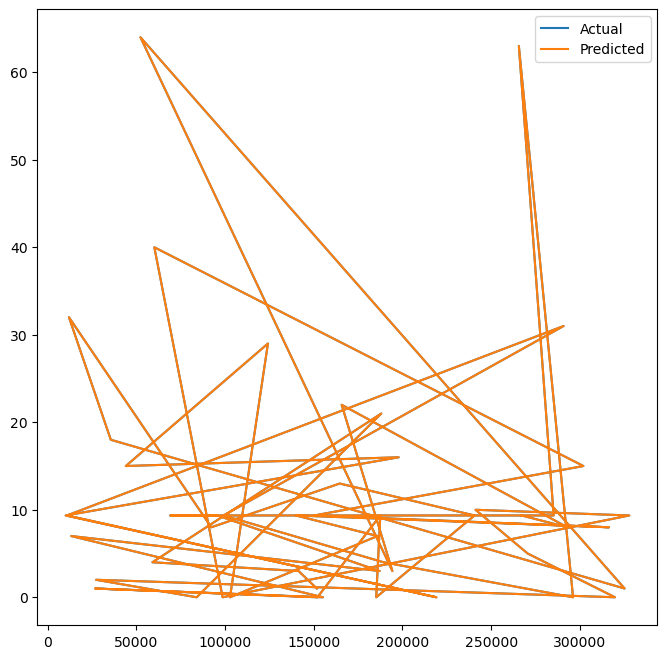

In [53]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(8,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [54]:
#Lasso Regression Model

In [57]:
# Reading the cleaned data csv file
df = pd.read_csv('c_data.csv')
df


,Unnamed: 0,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,COUNTY_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,0,2016,2,1,1,295.00,259.00,85.00,16.00,4.00,18.00,3.00,2.00,0.00,21.00,11.00
1,1,2016,2,1,2,295.00,259.00,86.00,16.00,3.00,18.00,3.00,1.00,0.00,21.00,10.00
2,2,2016,2,1,3,295.00,259.00,84.00,16.00,5.00,18.00,2.00,2.00,1.00,21.00,11.00
3,3,2016,2,1,4,222.68,185.55,81.23,12.56,8.31,15.57,7.31,1.47,0.74,17.91,9.35
4,4,2016,2,1,5,295.00,259.00,64.00,16.00,6.00,18.00,7.00,2.00,1.00,21.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332903,332903,2019,4,68,16,31.00,31.00,100.00,3.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
332904,332904,2019,4,68,1,47.00,42.00,89.00,9.00,19.00,0.00,0.00,0.00,0.00,3.00,6.00
332905,332905,2019,4,68,3,27.00,26.00,96.00,7.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00
332906,332906,2019,4,68,10,38.00,36.00,95.00,5.00,13.00,0.00,0.00,0.00,0.00,2.00,5.00


In [58]:
# Training and testing the dataset model
df_train = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR != '2019']
df_test = dn_model.loc[dn_model.REPORT_SCHOOL_YEAR == 2019]

In [59]:
# Importing the column 'Dropout_cnt' into test data and train data
y_test = df_test['DROPOUT_PCT']
y_train = df_train['DROPOUT_PCT']
df_target = df['DROPOUT_PCT']
X_train = df_train[df_train.columns.difference(['DROPOUT_PCT'])]
X_test = df_test[df_test.columns.difference(['DROPOUT_PCT'])]

In [60]:
from sklearn import linear_model

In [61]:
lasso_model = linear_model.Lasso(alpha=0.3)
lasso_model = lasso_model.fit(X_train, y_train)
y_Lasso = lasso_model.predict(X_test)

In [62]:
accu_train_Lasso = lasso_model.score(X_train,y_train)
accu_train_Lasso

0.9148547107691136

In [63]:
accu_test_Lasso = lasso_model.score(X_test,y_test)
accu_test_Lasso


0.9332820151850423

In [64]:
predicted = lasso_model.predict(X_test)

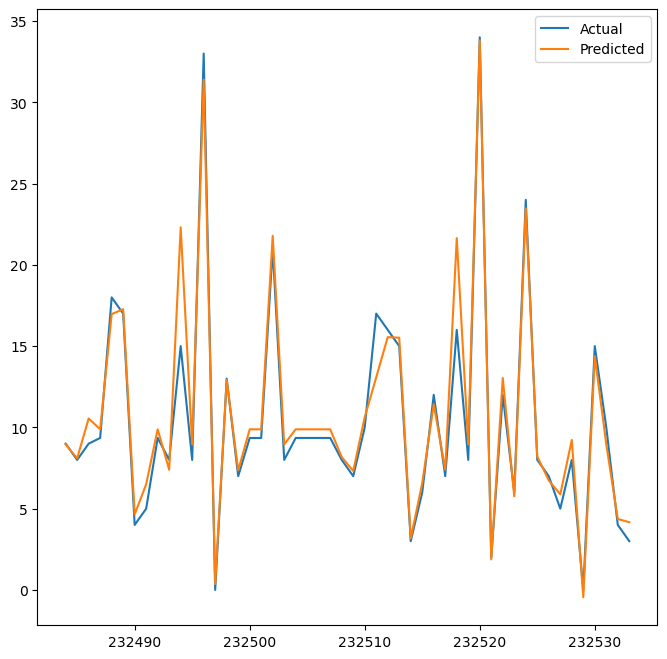

In [65]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(8,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [66]:
#Ridge Forest Regression Model

In [69]:
# Reading the cleaned data csv file
df = pd.read_csv('c_data.csv')
df


,Unnamed: 0,REPORT_SCHOOL_YEAR,AGGREGATION_INDEX,COUNTY_CODE,SUBGROUP_CODE,ENROLL_CNT,GRAD_CNT,GRAD_PCT,LOCAL_CNT,LOCAL_PCT,STILL_ENR_CNT,STILL_ENR_PCT,GED_CNT,GED_PCT,DROPOUT_CNT,DROPOUT_PCT
0,0,2016,2,1,1,295.00,259.00,85.00,16.00,4.00,18.00,3.00,2.00,0.00,21.00,11.00
1,1,2016,2,1,2,295.00,259.00,86.00,16.00,3.00,18.00,3.00,1.00,0.00,21.00,10.00
2,2,2016,2,1,3,295.00,259.00,84.00,16.00,5.00,18.00,2.00,2.00,1.00,21.00,11.00
3,3,2016,2,1,4,222.68,185.55,81.23,12.56,8.31,15.57,7.31,1.47,0.74,17.91,9.35
4,4,2016,2,1,5,295.00,259.00,64.00,16.00,6.00,18.00,7.00,2.00,1.00,21.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332903,332903,2019,4,68,16,31.00,31.00,100.00,3.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
332904,332904,2019,4,68,1,47.00,42.00,89.00,9.00,19.00,0.00,0.00,0.00,0.00,3.00,6.00
332905,332905,2019,4,68,3,27.00,26.00,96.00,7.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00
332906,332906,2019,4,68,10,38.00,36.00,95.00,5.00,13.00,0.00,0.00,0.00,0.00,2.00,5.00


In [70]:
# Importing the column 'Dropout_cnt' into test data and train data
y_test = df_test['DROPOUT_PCT']
y_train = df_train['DROPOUT_PCT']
df_target = df['DROPOUT_PCT']
X_train = df_train[df_train.columns.difference(['DROPOUT_PCT'])]
X_test = df_test[df_test.columns.difference(['DROPOUT_PCT'])]

In [71]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

Accuracy=[]

In [72]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [73]:
predicted = ridge_model.predict(X_test)

rid=ridge_model.score(X_train, y_train)
Accuracy.append(rid)
rid

0.9169907095984093

In [74]:
acc_test_Ridge = ridge_model.score(X_test,y_test)
acc_test_Ridge

0.9351165273285692

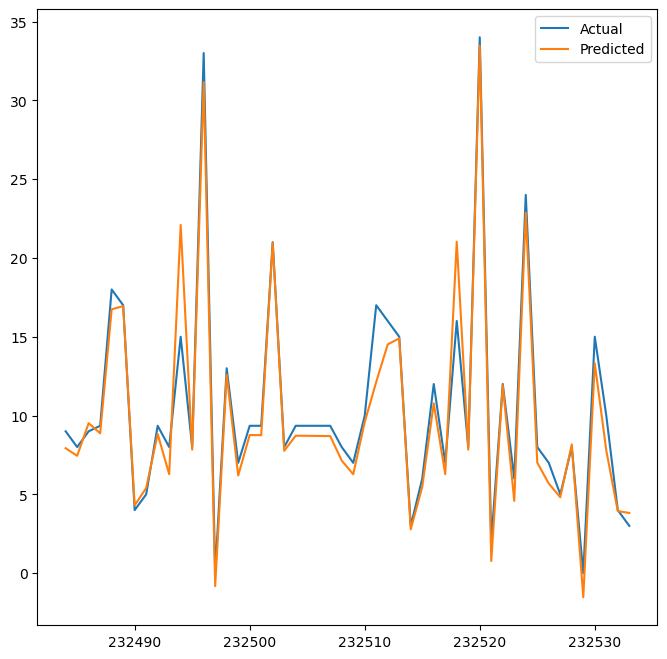

In [75]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(8,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [99]:
import pandas as pd
model_x = pd.DataFrame({'Model': ['DecisionTreeRegressor','Linear Regression Model',
                    'Polynomial Regression','Lasso Regression Model','Ridge Forest Regression'], 'Accuracy': [r2_score(Y_test,y_accu)*100,
                   accu_test*100,acc_test*100,accu_test_Lasso*100,acc_test_Ridge*100]})
model_x

,Model,Accuracy
0,DecisionTreeRegressor,88.963370
1,Linear Regression Model,93.511653
2,Polynomial Regression,100.000000
3,Lasso Regression Model,93.328202
4,Ridge Forest Regression,93.511653


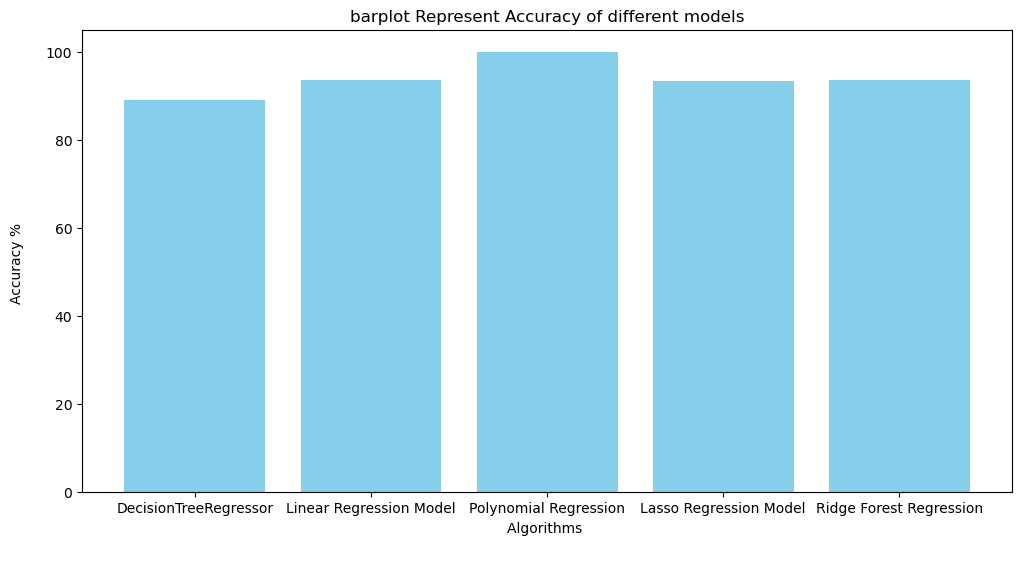

In [100]:
colors = ['skyblue']
plt.figure(figsize=(12,6))
plt.title("barplot Represent Accuracy of different models")
plt.ylabel("Accuracy % \n")
plt.xlabel("Algorithms \n")
plt.bar(model_x['Model'],model_ev['Accuracy'],color = colors)
plt.show()